In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
import glob
import matplotlib.pyplot as plt 

In [3]:
GRID_X, GRID_Y = 100, 100

data = []

fits_files = glob.glob("/media/bekah/BekahA/background_test/pics_and_photonlists/fuv_nobkg/e*_FUV_threshold_11_14_bkgsub.fits")

for file in fits_files:
    with fits.open(file) as hdul:
        count_image = hdul[1].data
        segmentation_map = hdul[2].data
        threshold_image = hdul[3].data
        header = hdul[0].header
        exposure_time = header.get("EXPTIME", np.nan)
        eclipse = header.get("ECLIPSE", np.nan)

        height, width = count_image.shape
        cell_height = height // GRID_Y
        cell_width = width // GRID_X

        for i in range(GRID_Y):
            for j in range(GRID_X):
                y_start, y_end = i * cell_height, (i + 1) * cell_height
                x_start, x_end = j * cell_width, (j + 1) * cell_width
                
                count_region = count_image[y_start:y_end, x_start:x_end]
                segmentation_region = segmentation_map[y_start:y_end, x_start:x_end]
                threshold_region = threshold_image[y_start:y_end, x_start:x_end]
                
                source_count = np.sum(segmentation_region > 0)
                
                avg_count_rate = np.mean(count_region)
                avg_threshold = np.mean(threshold_region)
                med_count_rate = np.median(count_region)
                med_threshold = np.median(threshold_region)
                
                data.append({
                    "eclipse": eclipse,  
                    "cell_x": j,
                    "cell_y": i,
                    "source_count": source_count,
                    "avg_count_rate": avg_count_rate,
                    "avg_threshold": avg_threshold,
                    "med_threshold": med_threshold,
                    "med_count_rate": med_count_rate,
                    "exposure_time": exposure_time
                })

df = pd.DataFrame(data)
df.to_csv("fuv_bkgsub.csv")

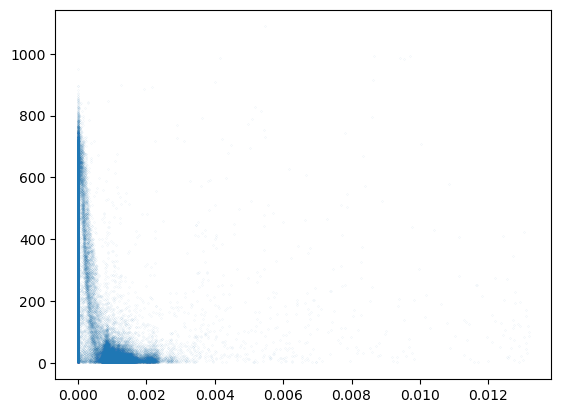

In [4]:
df_filtered = df[df["source_count"] > 0]
plt.scatter(df_filtered['avg_threshold'],df_filtered['source_count'],s=.001)

In [5]:
GRID_X, GRID_Y = 100, 100

data = []

fits_files = glob.glob("/media/bekah/BekahA/background_test/pics_and_photonlists/withbackground_fuv/e*_FUV_threshold_10_31.fits")

for file in fits_files:
    with fits.open(file) as hdul:
        count_image = hdul[1].data
        segmentation_map = hdul[2].data
        threshold_image = hdul[3].data
        header = hdul[0].header
        exposure_time = header.get("EXPTIME", np.nan)
        eclipse = header.get("ECLIPSE", np.nan)

        height, width = count_image.shape
        cell_height = height // GRID_Y
        cell_width = width // GRID_X

        for i in range(GRID_Y):
            for j in range(GRID_X):
                y_start, y_end = i * cell_height, (i + 1) * cell_height
                x_start, x_end = j * cell_width, (j + 1) * cell_width
                
                count_region = count_image[y_start:y_end, x_start:x_end]
                segmentation_region = segmentation_map[y_start:y_end, x_start:x_end]
                threshold_region = threshold_image[y_start:y_end, x_start:x_end]
                
                source_count = np.sum(segmentation_region > 0)
                
                avg_count_rate = np.mean(count_region)
                avg_threshold = np.mean(threshold_region)
                med_count_rate = np.median(count_region)
                med_threshold = np.median(threshold_region)
                
                data.append({
                    "eclipse": eclipse,  
                    "cell_x": j,
                    "cell_y": i,
                    "source_count": source_count,
                    "avg_count_rate": avg_count_rate,
                    "avg_threshold": avg_threshold,
                    "med_threshold": med_threshold,
                    "med_count_rate": med_count_rate,
                    "exposure_time": exposure_time
                })

df2 = pd.DataFrame(data)
df.to_csv("fuv_nobkgsub.csv")

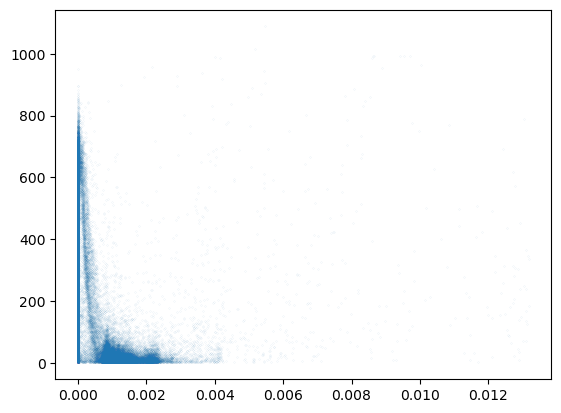

In [6]:
df_filtered2 = df2[df2["source_count"] > 0]
plt.scatter(df_filtered2['avg_threshold'],df_filtered2['source_count'],s=.001)

In [ ]:
plt.scatter(df_filtered['avg_count_rate'],df_filtered['source_count'],s=.0001)
plt.xlim(0,.00125)

In [ ]:
plt.scatter(df_filtered['med_threshold'],df_filtered['source_count'],s=.001)
plt.xlabel("median threshold in square")
plt.ylabel("# source pixels in square")

In [ ]:
plt.scatter(df_filtered['avg_count_rate'],df_filtered['source_count'],c=df_filtered['avg_threshold'],s=.0001)
plt.xlim(0,.00125)

In [ ]:
plt.scatter(df_filtered['cell_x'],df_filtered['cell_y'],c=df_filtered['avg_count_rate']*100,s=.001)

In [ ]:
from photutils.background import Background2D, MedianBackground
from astropy.stats import SigmaClip

GRID_X, GRID_Y = 100, 100

data = []

fits_files = glob.glob("/media/bekah/BekahA/background_test/pics_and_photonlists/fuv_nobkg/e*_FUV_threshold_11_14.fits")

for file in fits_files:
    with fits.open(file) as hdul:
        count_image = hdul[1].data
        segmentation_map = hdul[2].data
        threshold_image = hdul[3].data
        header = hdul[0].header
        exposure_time = header.get("EXPTIME", np.nan)
        eclipse = header.get("ECLIPSE", np.nan)

        sigma_clip = SigmaClip(sigma=3.)
        bkg_estimator = MedianBackground()
        bkg = Background2D(count_image,
                               (50, 50),
                               filter_size=(3, 3),
                               bkg_estimator=bkg_estimator,
                               sigma_clip=sigma_clip)
    
        back = bkg.background
        height, width = count_image.shape
        cell_height = height // GRID_Y
        cell_width = width // GRID_X

        for i in range(GRID_Y):
            for j in range(GRID_X):
                y_start, y_end = i * cell_height, (i + 1) * cell_height
                x_start, x_end = j * cell_width, (j + 1) * cell_width
                
                count_region = count_image[y_start:y_end, x_start:x_end]
                segmentation_region = segmentation_map[y_start:y_end, x_start:x_end]
                threshold_region = threshold_image[y_start:y_end, x_start:x_end]
                back_region = back[y_start:y_end, x_start:x_end]

                source_count = np.sum(segmentation_region > 0)
                
                avg_count_rate = np.mean(count_region)
                avg_threshold = np.mean(threshold_region)
                med_count_rate = np.median(count_region)
                med_threshold = np.median(threshold_region)
                avg_back = np.mean(back_region)
                med_back = np.median(back_region)
                min_back = np.min(back_region)
                
                data.append({
                    "eclipse": eclipse,  
                    "cell_x": j,
                    "cell_y": i,
                    "source_count": source_count,
                    "avg_threshold": avg_threshold,
                    "med_threshold": med_threshold,
                    "med_count_rate": med_count_rate,
                    "exposure_time": exposure_time,
                    "avg_back": avg_back,
                    "med_back": med_back,
                    "min_back": min_back
                    
                })

df = pd.DataFrame(data)

In [ ]:
df_filtered = df[df["source_count"] > 0]
plt.scatter(df_filtered['avg_back'],df_filtered['source_count'],s=.001)

In [ ]:
plt.scatter(df_filtered['med_back'],df_filtered['source_count'],s=.01)
plt.xlim(-.001,.002)

In [ ]:
plt.scatter(df_filtered['avg_back'],df_filtered['source_count'],s=.01)
plt.xlim(-.001,.002)

In [ ]:
plt.scatter(df_filtered['min_back'],df_filtered['source_count'],s=.01)


In [ ]:
plt.scatter(df_filtered['med_threshold'],df_filtered['source_count'],s=.001)
plt.xlabel("median threshold in square")
plt.ylabel("# source pixels in square")
plt.xlim(-.001,0.012)

In [ ]:
plt.scatter(df_filtered['med_back'],df_filtered['source_count'],s=.1)
plt.xlabel("median background in square")
plt.ylabel("# source pixels in square")
plt.xlim(-.001,0.012)

In [ ]:
plt.scatter(df_filtered['med_threshold'],df_filtered['med_back'],s=.1)
plt.xlabel("median threshold in square")
plt.ylabel("median background in square")
